In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score

In [2]:
cancer = load_breast_cancer(as_frame=True)

In [3]:
X_data = cancer["data"]
y_data = cancer["target"]

In [4]:
X_data.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y_data.unique()

array([0, 1])

In [6]:
X_dev, X_test, y_dev, y_test = train_test_split(X_data,y_data,random_state=42, test_size=0.2)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_dev,y_dev,random_state=42, test_size=0.2)

In [9]:
def dnn(n_features, n_output):
    input_lag = tf.keras.layers.Input(shape=(n_features,1))
    skjult_lag = tf.keras.layers.Dense(n_features*2, activation='relu')(input_lag)
    flatten = tf.keras.layers.Flatten()(skjult_lag)
    output_lag = tf.keras.layers.Dense(n_output, activation='sigmoid')(flatten)
    modell = tf.keras.models.Model(inputs=input_lag, outputs=output_lag)
    return modell

In [10]:
model = dnn(X_train.shape[1],1)

In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30, 60)              │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           1,801 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC(curve='ROC')])

In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30, 60)              │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           1,801 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
y_train.shape

(364,)

In [15]:
np.expand_dims(y_train,-1).shape

(364, 1)

In [16]:
history = model.fit(x=X_train,y=y_train, epochs=250, batch_size=10, validation_data=(X_val,np.expand_dims(y_val,-1)))

Epoch 1/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - auc: 0.5866 - binary_accuracy: 0.4256 - loss: 2.2405 - val_auc: 0.7722 - val_binary_accuracy: 0.7253 - val_loss: 0.5902
Epoch 2/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.6732 - binary_accuracy: 0.7993 - loss: 0.5576 - val_auc: 0.8907 - val_binary_accuracy: 0.7802 - val_loss: 0.5026
Epoch 3/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8070 - binary_accuracy: 0.8029 - loss: 0.4954 - val_auc: 0.9371 - val_binary_accuracy: 0.7473 - val_loss: 0.4779
Epoch 4/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.8433 - binary_accuracy: 0.8219 - loss: 0.4652 - val_auc: 0.9247 - val_binary_accuracy: 0.8901 - val_loss: 0.4001
Epoch 5/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8956 - binary_accuracy: 0.8803 - loss: 0.4186 - val_auc: 0.9389 - val_binary_accuracy: 0.8791 - val_loss: 0.3859
Epoch 6/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9015 - binary_accuracy: 0.8718 - loss: 0.3801 - val_auc: 0.9245 - val_bina

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9317 - binary_accuracy: 0.8796 - loss: 0.2677 - val_auc: 0.9707 - val_binary_accuracy: 0.9121 - val_loss: 0.2088
Epoch 41/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9581 - binary_accuracy: 0.9040 - loss: 0.2451 - val_auc: 0.9669 - val_binary_accuracy: 0.9121 - val_loss: 0.2321
Epoch 42/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9591 - binary_accuracy: 0.9037 - loss: 0.2357 - val_auc: 0.9722 - val_binary_accuracy: 0.9341 - val_loss: 0.2330
Epoch 43/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9603 - binary_accuracy: 0.8980 - loss: 0.2342 - val_auc: 0.9712 - val_binary_accuracy: 0.9121 - val_loss: 0.2050
Epoch 44/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9648 - binary_accuracy: 0.9119 - loss: 0.2224 - val_auc: 0.9727 - val_binary_accuracy: 0.9121 - val_loss: 0.2101
Epoch 45/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9527 - binary_accuracy: 0.9137 - loss: 0.2419 - val_auc: 0.9730 - val_binary_accur

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9600 - binary_accuracy: 0.9197 - loss: 0.2201 - val_auc: 0.9780 - val_binary_accuracy: 0.9121 - val_loss: 0.1785
Epoch 80/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9684 - binary_accuracy: 0.9111 - loss: 0.2099 - val_auc: 0.9730 - val_binary_accuracy: 0.9121 - val_loss: 0.2238
Epoch 81/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9354 - binary_accuracy: 0.9012 - loss: 0.2747 - val_auc: 0.9747 - val_binary_accuracy: 0.9121 - val_loss: 0.2007
Epoch 82/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9737 - binary_accuracy: 0.9139 - loss: 0.2098 - val_auc: 0.9775 - val_binary_accuracy: 0.9121 - val_loss: 0.1901
Epoch 83/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9507 - binary_accuracy: 0.9084 - loss: 0.2442 - val_auc: 0.9795 - val_binary_accuracy: 0.9121 - val_loss: 0.2399
Epoch 84/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9686 - binary_accuracy: 0.9108 - loss: 0.2448 - val_auc: 0.9788 - val_binary_accur

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9740 - binary_accuracy: 0.9183 - loss: 0.1878 - val_auc: 0.9808 - val_binary_accuracy: 0.9341 - val_loss: 0.1657
Epoch 119/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9765 - binary_accuracy: 0.9220 - loss: 0.1902 - val_auc: 0.9826 - val_binary_accuracy: 0.9231 - val_loss: 0.1982
Epoch 120/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9725 - binary_accuracy: 0.8984 - loss: 0.2205 - val_auc: 0.9808 - val_binary_accuracy: 0.9341 - val_loss: 0.1648
Epoch 121/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9767 - binary_accuracy: 0.9229 - loss: 0.1836 - val_auc: 0.9813 - val_binary_accuracy: 0.9451 - val_loss: 0.1636
Epoch 122/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9611 - binary_accuracy: 0.9073 - loss: 0.2303 - val_auc: 0.9808 - val_binary_accuracy: 0.9341 - val_loss: 0.1687
Epoch 123/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9768 - binary_accuracy: 0.9309 - loss: 0.1771 - val_auc: 0.9826 - val_binary_

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9857 - binary_accuracy: 0.9229 - loss: 0.1629 - val_auc: 0.9841 - val_binary_accuracy: 0.9231 - val_loss: 0.1760
Epoch 158/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9775 - binary_accuracy: 0.9429 - loss: 0.1882 - val_auc: 0.9793 - val_binary_accuracy: 0.9231 - val_loss: 0.1896
Epoch 159/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9790 - binary_accuracy: 0.9191 - loss: 0.1898 - val_auc: 0.9838 - val_binary_accuracy: 0.9231 - val_loss: 0.1760
Epoch 160/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9754 - binary_accuracy: 0.9018 - loss: 0.1944 - val_auc: 0.9836 - val_binary_accuracy: 0.9341 - val_loss: 0.1582
Epoch 161/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9802 - binary_accuracy: 0.9228 - loss: 0.1741 - val_auc: 0.9828 - val_binary_accuracy: 0.9560 - val_loss: 0.1527
Epoch 162/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9875 - binary_accuracy: 0.9492 - loss: 0.1406 - val_auc: 0.9803 - val_binary_

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9786 - binary_accuracy: 0.9344 - loss: 0.1832 - val_auc: 0.9843 - val_binary_accuracy: 0.9121 - val_loss: 0.1790
Epoch 197/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9869 - binary_accuracy: 0.9576 - loss: 0.1428 - val_auc: 0.9841 - val_binary_accuracy: 0.9560 - val_loss: 0.1482
Epoch 198/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9878 - binary_accuracy: 0.9543 - loss: 0.1256 - val_auc: 0.9846 - val_binary_accuracy: 0.9231 - val_loss: 0.2114
Epoch 199/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9862 - binary_accuracy: 0.9338 - loss: 0.1534 - val_auc: 0.9838 - val_binary_accuracy: 0.9451 - val_loss: 0.1487
Epoch 200/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9835 - binary_accuracy: 0.9217 - loss: 0.1738 - val_auc: 0.9848 - val_binary_accuracy: 0.9451 - val_loss: 0.1513
Epoch 201/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9847 - binary_accuracy: 0.9423 - loss: 0.1623 - val_auc: 0.9846 - val_binary_

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9896 - binary_accuracy: 0.9321 - loss: 0.1376 - val_auc: 0.9833 - val_binary_accuracy: 0.9451 - val_loss: 0.1437
Epoch 236/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9864 - binary_accuracy: 0.9314 - loss: 0.1626 - val_auc: 0.9848 - val_binary_accuracy: 0.9231 - val_loss: 0.1558
Epoch 237/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.9867 - binary_accuracy: 0.9391 - loss: 0.1551 - val_auc: 0.9854 - val_binary_accuracy: 0.9451 - val_loss: 0.1503
Epoch 238/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9872 - binary_accuracy: 0.9300 - loss: 0.1552 - val_auc: 0.9838 - val_binary_accuracy: 0.9451 - val_loss: 0.1432
Epoch 239/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9839 - binary_accuracy: 0.9293 - loss: 0.1591 - val_auc: 0.9846 - val_binary_accuracy: 0.9451 - val_loss: 0.1443
Epoch 240/250
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9832 - binary_accuracy: 0.9299 - loss: 0.1592 - val_auc: 0.9836 - val_binary_

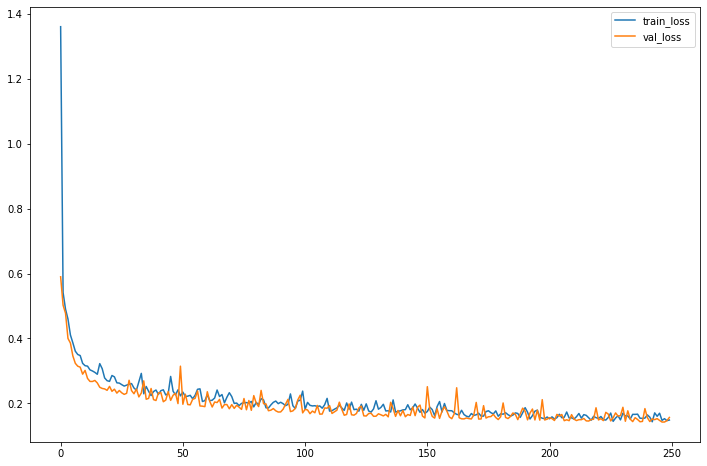

In [17]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

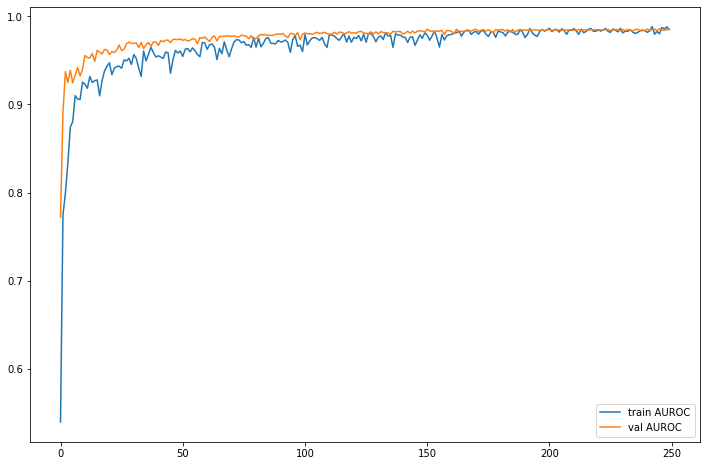

In [18]:
plt.figure(figsize=(12,8))
plt.plot(history.history["auc"], label="train AUROC")
plt.plot(history.history["val_auc"], label="val AUROC")
plt.legend()

In [19]:
y_test_hat = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [21]:
print("Nevralt nettverk:")
print("Nøyaktighet = ", round(accuracy_score(y_test,(y_test_hat>0.5)*1),2))
print("Sensitivitet = ",recall_score(y_test,(y_test_hat>0.5)*1,pos_label=1).round(2))
print("Spesifisitet = ",recall_score(y_test,(y_test_hat>0.5)*1,pos_label=0).round(2))
print("Presisjon = ",precision_score(y_test,(y_test_hat>0.5)*1).round(2))
print("F1-score = ",f1_score(y_test,(y_test_hat>0.5)*1).round(2))

Nevralt nettverk:
Nøyaktighet =  0.97
Sensitivitet =  0.99
Spesifisitet =  0.95
Presisjon =  0.97
F1-score =  0.98


In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_hat_logreg = logreg.predict(X_test)

print("LogReg:")
print("Nøyaktighet = ", round(accuracy_score(y_test,y_hat_logreg),2))
print("Sensitivitet = ",recall_score(y_test,y_hat_logreg).round(2))
print("Spesifisitet = ",recall_score(y_test,y_hat_logreg).round(2))
print("Presisjon = ",precision_score(y_test,y_hat_logreg).round(2))
print("F1-score = ",f1_score(y_test,y_hat_logreg).round(2))

LogReg:
Nøyaktighet =  0.96
Sensitivitet =  0.99
Spesifisitet =  0.99
Presisjon =  0.96
F1-score =  0.97


C:\Users\Bjorn\anaconda3\envs\new_tf\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
